<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_4_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [20]:
df = pd.read_csv('/content/Iris.csv')

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
X = df[['SepalLengthCm','PetalLengthCm','PetalLengthCm','PetalWidthCm']].values

In [36]:
pca = PCA(n_components=2)
data = pca.fit_transform(X)

In [45]:
data

array([[-3.55269786e+00, -2.33419057e-01],
       [-3.60721064e+00, -4.26490300e-02],
       [-3.79220764e+00,  1.16725555e-01],
       [-3.55849559e+00,  2.74901452e-01],
       [-3.57995425e+00, -1.38034043e-01],
       [-3.02492245e+00, -3.84947083e-01],
       [-3.66170301e+00,  2.63726355e-01],
       [-3.44947004e+00, -1.06638602e-01],
       [-3.74349259e+00,  4.34276037e-01],
       [-3.50400322e+00, -3.14739331e-02],
       [-3.34044448e+00, -4.88178656e-01],
       [-3.37349860e+00,  1.15526867e-01],
       [-3.66174383e+00,  3.25156387e-02],
       [-4.18947843e+00,  4.15254381e-01],
       [-3.62287158e+00, -9.63905034e-01],
       [-3.20412172e+00, -7.33893006e-01],
       [-3.54685932e+00, -5.10528849e-01],
       [-3.52542107e+00, -2.13198712e-01],
       [-2.97043008e+00, -6.91322468e-01],
       [-3.39493685e+00, -1.81803271e-01],
       [-3.07947604e+00, -4.25387773e-01],
       [-3.36766005e+00, -1.61582926e-01],
       [-4.21091668e+00,  1.17924244e-01],
       [-3.

In [39]:
print(pca.components_)

[[ 0.27256389  0.65242109  0.65242109  0.27276796]
 [-0.95385013  0.15697721  0.15697721  0.20220345]]


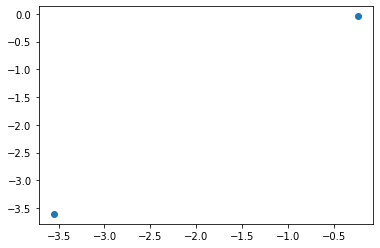

In [41]:
import matplotlib.pyplot as plt
plt.scatter(data[0], data[1])

In [48]:
data.shape

(150, 2)

In [52]:
new_df = pd.DataFrame(data, columns=['pc1','pc2'])

In [53]:
new_df

,pc1,pc2
0,-3.552698,-0.233419
1,-3.607211,-0.042649
2,-3.792208,0.116726
3,-3.558496,0.274901
4,-3.579954,-0.138034
...,...,...
145,2.414617,-0.141925
146,1.935516,0.095943
147,2.278274,-0.011816
148,2.539304,0.397791


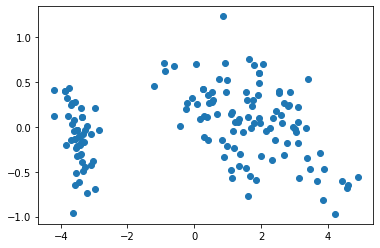

In [55]:
plt.scatter(new_df['pc1'], new_df['pc2'])

# K Means Clustering

In [56]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [83]:
lb = kmeans.labels_

In [91]:
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [76]:
centers = kmeans.cluster_centers_

In [77]:
centers

array([[-3.34249347, -0.0745584 ],
       [ 1.82631087,  0.04073809]])

In [62]:
out = kmeans.fit_transform(new_df.values)

In [65]:
final_df = pd.DataFrame(out)

In [67]:
final_df

,0,1
0,0.263482,5.385991
1,0.266633,5.434161
2,0.488705,5.619032
3,0.410827,5.389895
4,0.245798,5.409220
...,...,...
145,5.757505,0.616012
146,5.280763,0.122366
147,5.621118,0.455009
148,5.900733,0.797399


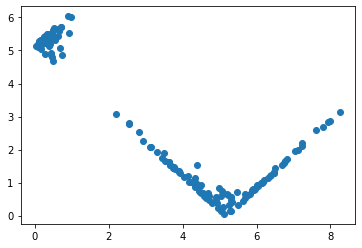

In [90]:
plt.scatter(final_df[0], final_df[1])

In [71]:
pds = kmeans.predict(new_df.values)

In [75]:
pds.shape

(150,)

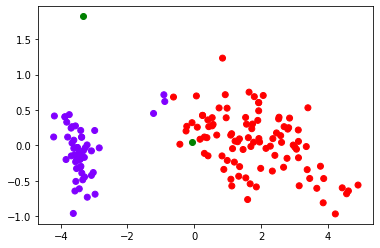

In [88]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['pc1'], new_df['pc2'], c=lb, cmap='rainbow')